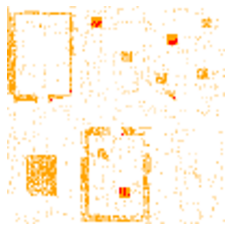

In [13]:
#各エージェントの重要度グラフを出力するプログラム
from PIL import Image
import numpy as np
import pathlib
import matplotlib.pyplot as plt

#各種設定
agent_number = 20
#agent_type = "Communicating"
agent_type = "TimeChange_Learning"
date = "04-02 00-31-39"
time = 4000000

#各エージェントについて
for i in range(agent_number):
    filename = "../../../../Volumes/ExternalDisk1/Patrolling/log/TTest/" + agent_type + "/Office/5-AMTDS-ESC/" + date + " robots-number=20_1/" + "/AgentImportance/Agent" + str(i) + "/Agent" + str(i) + "_Importance_" + str(time) + ".csv"            
    
    #filenameのデータを配列に格納
    data = np.loadtxt(filename, dtype="double", delimiter= ",")
        
    #配列dataのサイズの画像を作成
    height, width = data.shape
    img = Image.new("RGB", (width, height))
        
    #格納されている数字に従って、画像の色を設定
    for y in range(height):
        for x in range(width):
            imp = data[y][x]
            #重要度が大きくなるほど色が濃くなる
            if imp == -1:
                img.putpixel((x, y),(0, 0, 0))
            elif imp == 0:
                img.putpixel((x, y),(255, 255, 255))
            elif imp < pow(10, -7):
                img.putpixel((x, y),(255, 236, 204))
            elif imp < 5 * pow(10, -6):
                img.putpixel((x, y),(255, 226, 178))
            elif imp < 5 * pow(10, -5):
                    img.putpixel((x, y),(255, 208, 127))
            elif imp < 5 * pow(10, -4):
                    img.putpixel((x, y),(255, 165, 0))
            elif imp > 0:
                    img.putpixel((x, y),(255, 0, 0))
            else:
                    print("({0},{1})でエラー".format(x,y))

            #print("{0},{1}".format(width*5, height*5))
    #そのままだと小さいので、5倍の大きさにする
    img = img.resize(((width*5), (height*5)))

    #フォルダがない場合は、作成
    p = pathlib.Path("../../../../Volumes/ExternalDisk1/Patrolling/result/agent_importance/" +agent_type + "/" + date + "/Agent" + str(i))
    if not p.exists():
        p.mkdir(parents=True)
    
    #指定したファイルに画像を保存
    new_filename = "graph" + "_Agent" + str(i) + ".png"
    img.save(str(p) + "/" + new_filename)

    # 画像をNumpy配列に変換する
    image_narray = np.asarray(img)
    
    #座標を削除
    plt.axis('off')
    
    #画像を表示
    plt.imshow(image_narray)